In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('poly.csv')
df

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [4]:
df=df.drop(columns=['sno'])
df

,Temperature,Pressure
0,0,0.0002
1,20,0.0012
2,40,0.0060
3,60,0.0300
4,80,0.0900
5,100,0.2700


In [5]:
df.dtypes

Temperature      int64
Pressure       float64
dtype: object

In [6]:
df.tail()

,Temperature,Pressure
1,20,0.0012
2,40,0.0060
3,60,0.0300
4,80,0.0900
5,100,0.2700


In [7]:
df.head()

,Temperature,Pressure
0,0,0.0002
1,20,0.0012
2,40,0.0060
3,60,0.0300
4,80,0.0900


In [8]:
df.isna().sum()

Temperature    0
Pressure       0
dtype: int64

In [9]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
x

array([[  0],
       [ 20],
       [ 40],
       [ 60],
       [ 80],
       [100]])

In [10]:
y

array([2.0e-04, 1.2e-03, 6.0e-03, 3.0e-02, 9.0e-02, 2.7e-01])

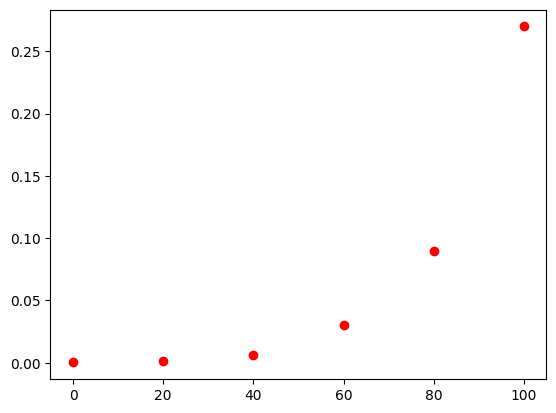

In [11]:
plt.scatter(x,y,color='r')

<Axes: >

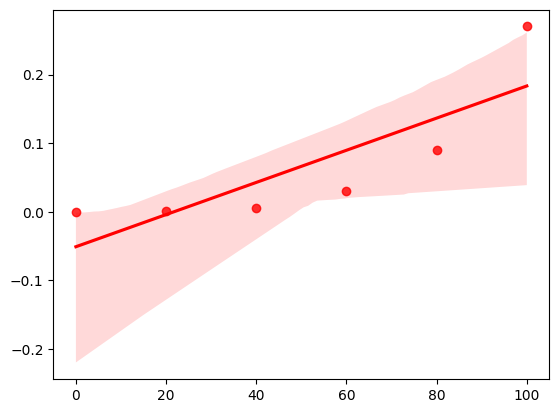

In [12]:
sns.regplot(x=x,y=y,color='r')

In [13]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)
y_pred=model.predict(x)
y_pred

array([-0.05086667, -0.00402667,  0.04281333,  0.08965333,  0.13649333,
        0.18333333])

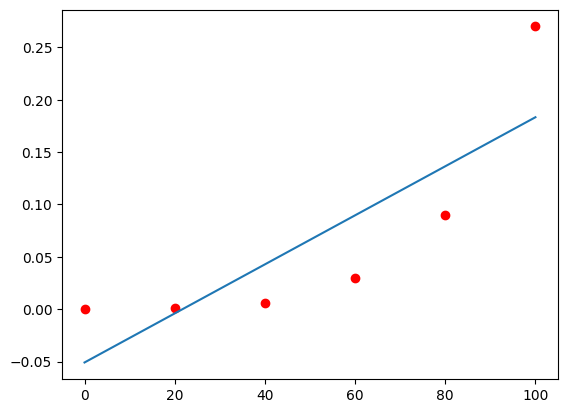

In [14]:
plt.scatter(x,y,color='r')
plt.plot(x,y_pred)

In [15]:
df1=pd.DataFrame({'Actual_data':y,'Predicted_data':y_pred,'Diffrence':y-y_pred})
df1

,Actual_data,Predicted_data,Diffrence
0,0.0002,-0.050867,0.051067
1,0.0012,-0.004027,0.005227
2,0.0060,0.042813,-0.036813
3,0.0300,0.089653,-0.059653
4,0.0900,0.136493,-0.046493
5,0.2700,0.183333,0.086667


In [16]:
print(model.coef_)

[0.002342]


In [17]:
print(model.intercept_)

-0.05086666666666667


In [18]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y,y_pred)
mae


0.047653333333333346

In [19]:
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(y,y_pred)
mape

44.775078189300416

In [20]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y,y_pred)
mse

0.002870267555555557

In [21]:
from sklearn.metrics import root_mean_squared_error
rmse=root_mean_squared_error(y,y_pred)
rmse

0.053574878026511244

In [22]:
from sklearn.metrics import r2_score
score=r2_score(y,y_pred)
score

0.690349972603981

In [23]:
from sklearn.preprocessing import PolynomialFeatures
feature=PolynomialFeatures(degree=2)
x_poly=feature.fit_transform(x)
x_poly

array([[1.0e+00, 0.0e+00, 0.0e+00],
       [1.0e+00, 2.0e+01, 4.0e+02],
       [1.0e+00, 4.0e+01, 1.6e+03],
       [1.0e+00, 6.0e+01, 3.6e+03],
       [1.0e+00, 8.0e+01, 6.4e+03],
       [1.0e+00, 1.0e+02, 1.0e+04]])

In [24]:
x_poly.shape

(6, 3)

In [26]:
model1=LinearRegression()
model1.fit(x_poly,y)
y_poly=model1.predict(x_poly)
y_poly

array([ 0.01555, -0.01731, -0.01032,  0.03652,  0.12321,  0.24975])

In [27]:
y

array([2.0e-04, 1.2e-03, 6.0e-03, 3.0e-02, 9.0e-02, 2.7e-01])

In [28]:
mape1=mean_absolute_percentage_error(y,y_poly)
mape1

15.926055555558056

In [29]:
score1=r2_score(y,y_poly)
score1

0.9568461098911795

In [30]:
df1=pd.DataFrame({'Actual_value':y,'Simple_reg':y_pred,'Poly_reg':y_poly})
df1

,Actual_value,Simple_reg,Poly_reg
0,0.0002,-0.050867,0.01555
1,0.0012,-0.004027,-0.01731
2,0.0060,0.042813,-0.01032
3,0.0300,0.089653,0.03652
4,0.0900,0.136493,0.12321
5,0.2700,0.183333,0.24975


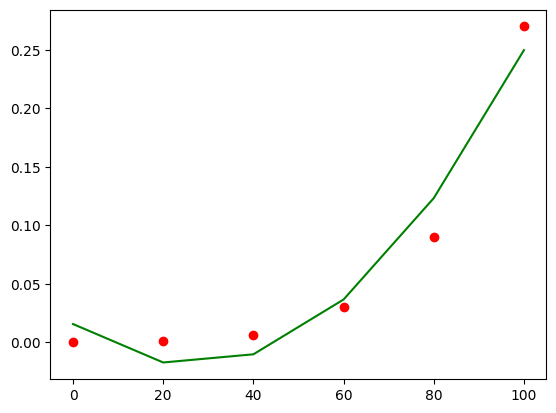

In [31]:
plt.scatter(x,y,color='r')
plt.plot(x,y_poly,color='g')